In [1]:
pip install pyodbc sqlalchemy pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install summarytools

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sqlalchemy import create_engine #used to connect to your database
import pandas as pd 
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary

In [4]:
server = "DESKTOP-P89DQ7T\SQLEXPRESS"
database = "Project_1"
username = ""
password = ""
#creating the connection

# Create connection string
if username and password:
    connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
else:
    connection_string = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes"
# Create SQLAlchemy engine
engine = create_engine(connection_string)

# Query the data
query = "SELECT * FROM [dbo].[Maths_grades];" 
df = pd.read_sql(query, engine)

# Display the data
print(df.head())

#Close the engine
engine.dispose()

   Student_ID Student_Country  Question_ID Type_of_Answer Question_Level  \
0         647         Ireland           77              0          Basic   
1          41        Portugal           77              1          Basic   
2         340        Portugal           77              1          Basic   
3         641           Italy           77              0          Basic   
4         669        Portugal           77              1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
3  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
4  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  


In [5]:
#EDA

In [6]:
dfSummary(df, is_collapsible=False) #or True

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Student_ID[int64],Mean (sd) : 775.4 (460.6)min < med < max:26.0 < 885.0 < 1565.0IQR (CV) : 839.0 (1.7),372 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsklEQVR4nO3cz4raQBzA8d/UVaJCggh68wUKPXj0IfqwfYQefALfwJsgIWK6wZikh9JF6FbNjNH5Dd/PeTObw5dO50/WNE0jgO++vPoFgHu83foBY8xQRAaW45+apnm3fBb4cDVUY8xwOp1+j+N4YjP44XBIjTE/iBWubv2LOojjeLJard6TJCnaDJxlWbReryf7/X4gIoQKJzenfhGRJEmK2Wz2y2L8ocUzwD9YTEEFQoUKhAoVCBUqECpUIFSoQKhQgVChwl0b/tAj1LsZhBqQkO9mEGpYgr2bQaiecZy647qu+0mSpKHdzSBUj7hO3WVZRlVVfS2K4qeI2ITqLUL1i/XULSKy3W4nm81mdD6fe1283CsRqodsr1Wmaert1O2KfVSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUMHrI9RQLwGjPW9DDfkSMNrzNlQJ+BIw2vM5VBHhD7ThDxZTUIFQoYL3Uz+ep6qqvojExhjbITrbaSFUiIhInuf9siy/LRaLXq/Xa/0ZjEi3Oy2E2gGH/d+4ruv+o9/nHqfT6S2KotFyuSzm83na9vmud1qCDfVV05jL/q8PX5GOx2PbXRaRDndaggz1xdOY9f5vyF+RugoyVB+mMZv935C/InUVZKh/+TqNoT32UaECoUIFQoUKhAoVCBUqECpUCHp7Cs/leBp49SSQUPEQrqeBt04CCRUP4XIaeM9JIKHioRxOA6+eBLKYggqEChWY+v/DYQX7ssvPISPUT7isYH24/BwiQv2EywqWy8/dINQrbFawXH7uBospqECoUKHTqd/x7JfVMz50Fqrr2S+rZ1zqLFTXL0FZPeNS56t+27NfVs+4xGIKKhAqVCBUqHDX/1GzLIvaDnw8HiMRkTzPo91uN3rm81p/t9b3dn3+nr5+A5EGvMXYDrlqAAAAAElFTkSuQmCC"">",0(0.0%)
2,Student_Country[object],1. Portugal2. Lithuania3. Italy4. Slovenia5. Ireland6. Russian Federation7. Romania8. Spain,"5,495 (57.6%)1,443 (15.1%)1,358 (14.2%)755 (7.9%)300 (3.1%)107 (1.1%)60 (0.6%)28 (0.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADaUlEQVR4nO3dQU7bUBiF0d9RRJuJoygSS2hnLIBFsNguIgtg2D2gCA8aYJIOSimEMEjgXVfhnBU8VV9tbPlCt91uCxImYx+Az0NsxIiNGLERIzZixEZMV1Wzqjob+yAn7mG73W7GPsTYpsvl8qrv+8XYBzllwzCsu6778dmDm/Z9v7i8vNzM5/O7sQ9zim5vb7+uVqvFzc3NWVV97tiqqubz+d35+fmvsQ9zwmZjH+B/4AGBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IiZVv35DGbsg5wq/7b/TIdhWK9Wq0X5DKaZYRjWVfUw9jnG5rPwDJ+FV1Xn1y+Q0vrK5n80T5oOXgw9eK7Z4MXQg12tBy+ecHnipS4xYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEdNs8GLowa6mgxdDD57zWTgxBi/EeEAgpuVt1C2UF5qtqyyr2NVkXWVZxT4t11WWVbzgAYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiGmyrrKsYp9m6yrLKnb5LJwY6ypijrmyuWJxlIMHL4YsHOugwYshC+9xzODFkIWjeKlLjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMQcNHgxZOE9Dh68GLJwLJ+FE2PwQowHBGLeuo26VfLh9q6rLKho4dW6yoKKVt5aV1lQ8eE8IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMa/WVRZUtLJ3XWVBRQs+CyfGuoqY51c2VzOaehq8GLnQ2qTv+8XFxUU9Lqxa/ClIqKrH92yz2ex+7INw+rzUJUZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMpKpqs9l8GfsgnL7JMAzr6+triyqas0EgxrqKmL9XtnJVo7Xpcrm8qqqyrKK1Sd/3C8sqErxnI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IiZPg5dqoxdaMxn4cQYvBDjZzZiJl3Xfe+6zt8YpblJVX2rKr9+gebcRokRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEbMpKp+VtX92Afh9Bm8EOM2SozYiBEbMWIjRmzEiI2Y35IST3t9PRJOAAAAAElFTkSuQmCC"">",0(0.0%)
3,Question_ID[int64],Mean (sd) : 478.9 (249.2)min < med < max:77.0 < 428.0 < 1549.0IQR (CV) : 248.0 (1.9),833 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsElEQVR4nO3cT24aMRiH4c+FoIFIgxAV7LhApS5Y5hA9bI7QSJwgN8gOaYQ8gkKBYbpqV2kS7JkyP/d99k68eGXmn+3qujag6z7degLAR/RvPYG3OOeGZjYIHH6s63rf5HxwO50N1Tk3nE6n3/I8n4SML8ty45x7JNY0dDZUMxvkeT55eHjYj8fjwzUDvffZarWaFEUxMDNCTUCXQzUzs/F4fJjNZj8Chg4bnwxuhpspSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSGj1pJTIQ87yy+Vy1+R8oKu1UGMPOTudTllVVV8Oh8N3Mws50gcJaXNFDT7kzMzs5eVl8vz8PDqfz702JgctrR+SFnrI2Waz4ZAz/MHNFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiS8+z1qxHYStpKgMW+GGrOdhK0kaNJ7K2rwdhL1rSSRGxOPdV3vm5zP/+5DW1FCtpMobyWJ3ZhYluXGOfdIrM1pfc+UqOBfEu99tlqtJkVRDMyMUBtCqG8I3ZhoZrK/Jl2VbKhVVd2ZWe6cCxnOE4uOSTLU3W53dzqdvi4Wi16v17v6TAGeWHRPkqEej8d+lmWj5XJ5mM/nm2

In [7]:
#We can see that there are no missing values 

In [8]:
#checking for duplicates
df.duplicated().sum() 

2083

In [9]:
#dropping duplicates
data_no_dups = df.drop_duplicates()

In [10]:
data_no_dups

,Student_ID,Student_Country,Question_ID,Type_of_Answer,Question_Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
...,...,...,...,...,...,...,...,...
9541,175,Italy,1497,1,Basic,Complex Numbers,Complex Numbers,"Imaginary part,Conjugate number,Modulus of a c..."
9542,175,Italy,1514,0,Basic,Complex Numbers,Complex Numbers,Operations with complex numbers
9543,175,Italy,1521,0,Basic,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...","Quadratic equations,Simplify expressions,Linea..."
9544,175,Italy,1526,1,Basic,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...","Linear equations,Quadratic equations,Simplify ..."


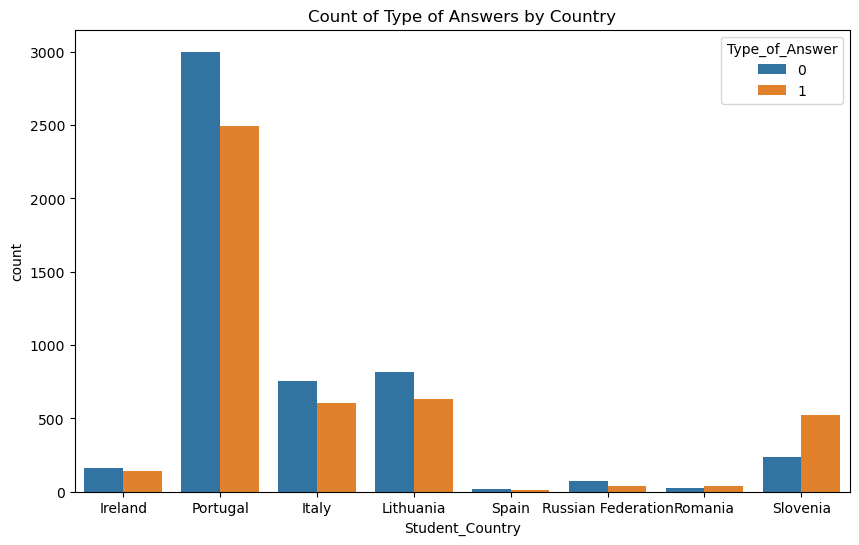

In [11]:
#a -Are there differences in performance (Type of Answer) between students from different countries (Student Country)?
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = 'Student_Country', hue = 'Type_of_Answer')
plt.title('Count of Type of Answers by Country')
plt.show()

From the graph we can see that there are difference in performances between students from different countries 

In [12]:
#b. Which countries have the highest percentage of correct answers (Type of Answer= 1)?

In [27]:
correct_answers = df[df['Type_of_Answer'] == '1']
country_correct_pct = correct_answers.groupby('Student_Country').size()/df.groupby('Student_Country').size() #i used .size() instead of .count() to count every row including nullones containing null values
print(country_correct_pct.sort_values(ascending = False))

Student_Country
Slovenia              0.687417
Romania               0.583333
Ireland               0.460000
Portugal              0.453867
Italy                 0.446244
Lithuania             0.435897
Spain                 0.428571
Russian Federation    0.345794
dtype: float64


From the graph we can tell that portugal had the highest count of type of answers. Now to finding the percentage 

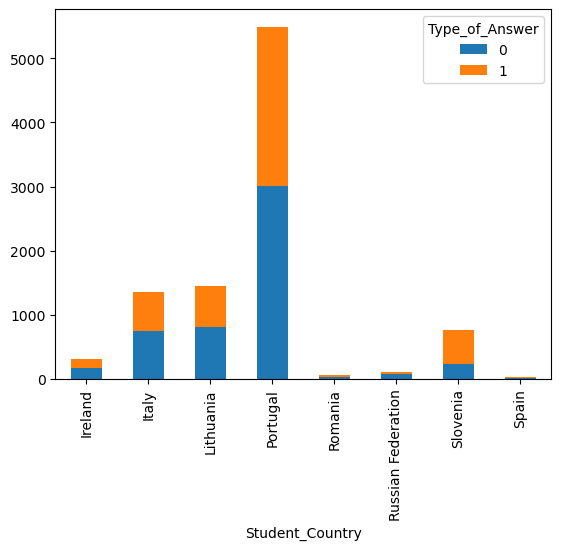

In [29]:
#Distribution of Correct vs Incorrect Answers by Country
answer_distribution = df.groupby(["Student_Country", "Type_of_Answer"]).size().unstack()
answer_distribution.plot(kind="bar", stacked = True)
plt.show() #add labels to graph and change x axis font

In [15]:
#d Is there a pattern in the Type of Answer (correct or incorrect) by the Question Level?

Type_of_Answer     0     1
Question_Level            
Advanced         849   853
Basic           4227  3617


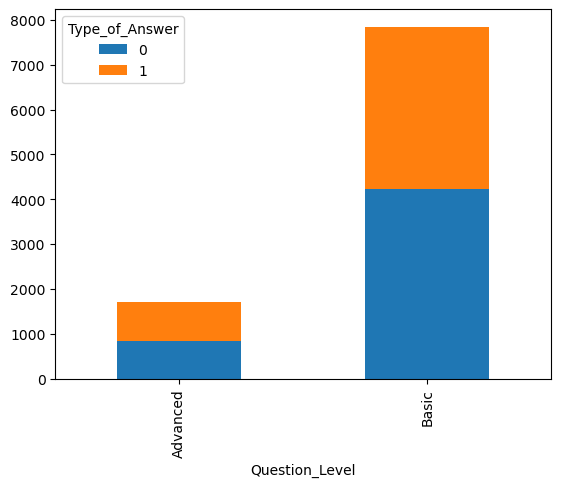

In [16]:
level_pattern = df.groupby(["Question_Level", "Type_of_Answer"]).size().unstack()
print(level_pattern)

level_pattern.plot(kind="bar", stacked=True)
plt.show()

Yes there is a pattern in the type of answer by question levels. From the the graph above we can tell that majority of the students answered in the basic level

In [30]:
# What is the average success rate on different question levels (e.g., easy vs hard)?
success_rate = df[df['Type_of_Answer'] == '1'].groupby('Question_Level').size()/df.groupby('Question_Level').size()
print(success_rate)

Question_Level
Advanced    0.501175
Basic       0.461117
dtype: float64


In [18]:
#f. Which topics are students performing the best in? (i.e., highest percentage ofcorrect answers per Topic)

In [31]:
topic_performance = df[df["Type_of_Answer"] == '1'].groupby("Topic").size() / df.groupby("Topic").size() * 100
print(topic_performance.sort_values(ascending=False))

Topic
Set Theory                             64.285714
Graph Theory                           58.181818
Differential Equations                 53.703704
Linear Algebra                         49.022005
Analytic Geometry                      48.882682
Statistics                             47.941176
Fundamental Mathematics                46.577017
Complex Numbers                        45.439189
Integration                            44.444444
Numerical Methods                      38.709677
Optimization                           38.461538
Probability                            37.500000
Real Functions of a single variable    35.365854
Differentiation                        34.196891
dtype: float64


In [24]:
#Students struggle more with subtopics like integration techniques and probability